In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [513]:
Raw_data=pd.read_excel('LD_NET.xlsx')
data1=Raw_data.iloc[11165:11500, 1:]
data1.head()

,MW01,MW02,MW03,MW04,MW05,MW06,MW07,MW08,MW09,MW10,...,MW15,MW16,MW17,MW18,MW19,MW20,MW21,MW22,MW23,MW24
11165,61917,58868,56841,55690,55187,55401,57606,61915,67982,72095,...,77680,77747,77954,77878,76226,75502,74273,71254,67689,65559
11166,61645,58534,56388,55045,54331,54139,55399,57958,61675,64997,...,70096,70010,70330,70453,70420,70613,70272,68068,65130,63361
11167,59553,56656,54614,53324,52760,52618,53680,55550,58412,61799,...,67808,68208,68876,69794,70368,71198,71247,69144,66039,62692
11168,58588,55931,54201,53297,53229,54249,57664,64015,72971,78384,...,85069,85146,85562,84224,82052,81019,78872,75514,71342,68688
11169,64086,60965,59043,57778,57515,58105,60893,66342,74482,79428,...,84837,84845,85530,84752,82397,81012,78799,75028,70966,68415


In [514]:
print(len(data1))
data2=data1.values
data=data2.flatten()
print(len(data))

335
8040


In [10]:
weather_data=pd.read_excel('Work_Weather.xlsx')
weather_data.head()

,Point,Location,Date,Time,Precipitatin (mm),Wind speed(m/s),Wind direction (16방위),Humidity (%),Local Pressure (hPa),Sunshine (hr),Solar Radiation (MJ/m2),Snow (cm),Unnamed: 12
0,108,서울,2020-01-01,01:00:00,-5.9,1.7,50.0,40.0,1033.0,NaN,0.0,NaN,NaN
1,108,서울,2020-01-01,02:00:00,-5.7,0.1,0.0,42.0,1032.8,NaN,0.0,NaN,NaN
2,108,서울,2020-01-01,03:00:00,-5.6,0.0,0.0,0.0,46.0,1032.7,0.0,NaN,NaN
3,108,서울,2020-01-01,04:00:00,-5.4,0.0,0.0,50.0,1032.8,NaN,0.0,NaN,NaN
4,108,서울,2020-01-01,05:00:00,-5.2,0.0,0.0,55.0,1032.3,NaN,0.0,NaN,NaN


In [23]:
weather_data.fillna(0, inplace=True)
weather_data.describe()

,Point,Precipitatin (mm),Wind speed(m/s),Wind direction (16방위),Humidity (%),Local Pressure (hPa),Sunshine (hr),Solar Radiation (MJ/m2),Snow (cm),Unnamed: 12
count,8040.0,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,108.0,14.523022,2.241007,174.331841,73.001418,895.094055,130.331697,0.579295,0.033036,0.002612
std,0.0,9.458137,1.951360,120.806781,52.354400,313.889725,337.751764,0.915478,0.198006,0.093650
min,108.0,-11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.0,6.900000,1.200000,50.000000,49.000000,1007.000000,0.000000,0.000000,0.000000,0.000000
50%,108.0,15.300000,2.000000,230.000000,64.000000,1014.600000,0.000000,0.000000,0.000000,0.000000
75%,108.0,22.700000,2.900000,290.000000,79.000000,1022.100000,1.000000,0.930000,0.000000,0.000000
max,108.0,35.200000,70.000000,360.000000,1002.400000,1037.100000,1033.400000,5.500000,5.100000,4.900000


In [35]:
solar_radiation=weather_data.iloc[:, 10]
solar_radiation.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Solar Radiation (MJ/m2), dtype: float64

In [36]:
solarRadiation_data=solar_radiation.values

In [968]:
def get_solarCapacity(value):
    Capacity=value
    Solar_capacity1=Capacity*solarRadiation_data/4
    Solar_capacity1[Solar_capacity1>value]=value
    return Solar_capacity1

Solar_capacity1=get_solarCapacity(5000)
Solar_capacity2=get_solarCapacity(8000)
Solar_capacity3=get_solarCapacity(12000)


In [969]:
Solar_capacity2.max()

8000.0

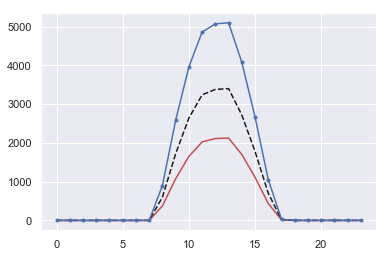

In [970]:
plt.plot(Solar_capacity1[48:72] ,'r-')
plt.plot(Solar_capacity2[48:72] ,'k--')
plt.plot(Solar_capacity3[48:72] ,'b.-')
plt.show()

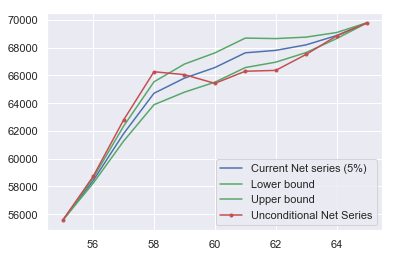

In [997]:
from random import random
# Net_series=pd.Series(Net_data)
# def random_series(value):
#     error=[]
#     for i in range(value):
#         error.append(random())
#     return error
# random_get=random_series(len(Solar_capacity1))
Baseline1=Net_series + Solar_capacity1
Net_series1=Baseline1-0.5*Solar_capacity1
Net_series2=Baseline1- 1.5*Solar_capacity1
Net_series3=Baseline1-2.0*Solar_capacity1*random_get

#plt.plot(Baseline1[48:72], 'r-', label='Baseline1')
plt.plot(Net_series[55:66], 'b-', label='Current Net series (5%)')
plt.plot(Net_series1[55:66], 'g-', label='Lower bound')
plt.plot(Net_series2[55:66], 'g-', label='Upper bound')
plt.plot(Net_series3[55:66], '.r-', label='Unconditional Net Series')
plt.legend(loc='lower right')
plt.show()


In [989]:
from random import random
random()


0.6306338440247521

In [837]:
len(Solar_capacity)
np.max(Solar_capacity)

5000.0

In [573]:
Net_data=data
len(Net_data)

8040

In [574]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [793]:
Net_series=pd.Series(Net_data)
Baseline_series=Net_series + Solar_capacity
result1=seasonal_decompose(Net_series, model='additive', freq=24, extrapolate_trend='freq')
result2=seasonal_decompose(Baseline_series, model='additive', freq=24, extrapolate_trend='freq')

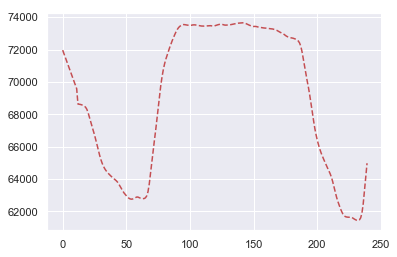

In [864]:
#plt.plot(result1.resid[0:240], 'b-')
plt.plot(result1.trend[0:240], 'r--')
plt.show()

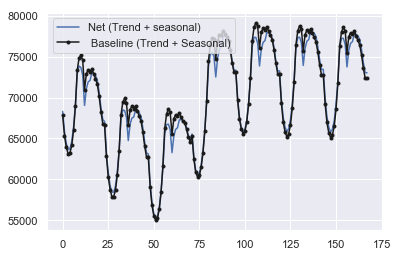

In [806]:
comp1=result1.trend+result1.seasonal
comp2=result2.trend+result2.seasonal
 
plt.plot(comp1[0:168], 'b-', label='Net (Trend + seasonal)')
plt.plot( comp2[0:168], '.k-', label=' Baseline (Trend + Seasonal)')
plt.legend(loc='upper left')
plt.show()


In [839]:
print(np.max(Net_data), np.min(Net_data))
print(np.max(est_PV), np.min(est_PV))
print(np.max(Baseline_series), np.min(Baseline_series))


87586 38733
3918.1250163243285 446.71882560205984
88829.5 38733.0


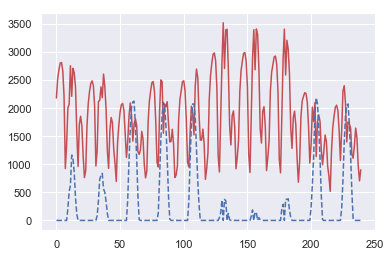

In [838]:
season_PV=0.5*np.sqrt(abs(result2.seasonal**2 -result1.seasonal**2)) + 0.4 *np.sqrt(abs(result2.resid**2 - result1.resid**2))
plt.plot(season_PV[0:240], 'r-')
plt.plot(Solar_capacity[0:240], 'b--')

plt.show()


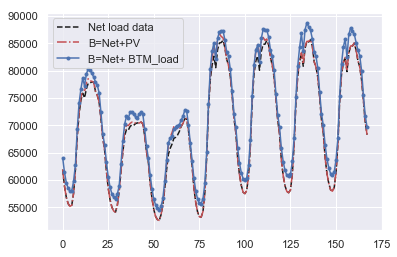

In [836]:
Baseline_extract=Net_series+season_PV
plt.plot(Net_series[0:168], 'k--', label='Net load data')
plt.plot(Baseline_series[0:168],'r-.', label='B=Net+PV')
plt.plot(Baseline_extract[0:168], '.b-', label='B=Net+ BTM_load')
plt.legend(loc='upper left')
plt.show()

In [618]:
Est_PV=0.5*np.sqrt(abs(result2.seasonal**2 -result1.seasonal**2)) +  0.4*np.sqrt(abs(result2.resid**2 - result1.resid**2))
#Est_PV=  1.0*np.sqrt(abs(result2.resid**2 - result1.resid**2))

In [823]:
est_result=Est_PV
est_result=np.array(est_result)
est_result[est_result<0]=0

In [824]:
from scipy.stats import pearsonr
corr, _=pearsonr(Baseline_series, est_result)
print('Pearson correlation: %.3f' %corr)

Pearson correlation: -0.207


In [848]:
min_corr=[]
x=np.linspace(0.01, 1.01, 100)
for i in range(0, 100):
    alpha=x[i]
    for ii in range(0, 100):
        beta=x[ii]
        est_PV=  alpha*np.sqrt(abs(result2.seasonal**2 -result1.seasonal**2))+ beta*np.sqrt(abs(result2.resid**2 - result1.resid**2))
        corr, _=pearsonr(Baseline_series,  est_PV)
        min_corr.append(abs(corr))

In [851]:
print(np.argmin(min_corr))
est_PV=  0.5*np.sqrt(abs(result2.seasonal**2 -result1.seasonal**2))+ 0.4*np.sqrt(abs(result2.resid**2 - result1.resid**2))

5040


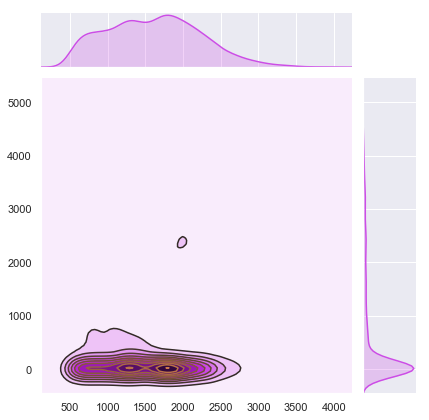

In [852]:
import seaborn as sns


est_PV[est_PV>5000]=5000

sns.set()
sns.jointplot(est_PV, Solar_capacity,  kind='kde', color=[.8, .3, .9]).plot_joint(sns.kdeplot)

In [307]:
ci=1.96 * np.std(est_result)/np.sqrt(np.mean(est_result))

In [308]:
ci

86.18347494516885

In [860]:
#Lower_bound=est_result-40*ci
#Upper_bound=est_result+40*ci
Lower_bound=Net_series-est_PV
Upper_bound=Net_series+est_PV

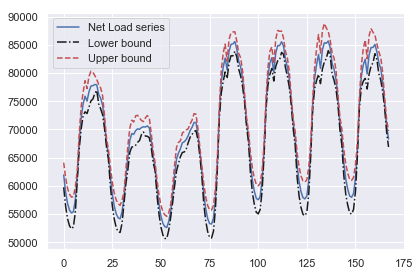

In [862]:
plt.plot(Net_series[0:168], 'b-',label='Net Load series')
plt.plot(Lower_bound[0:168], 'k-.',label='Lower bound')
plt.plot(Upper_bound[0:168],  'r--', label='Upper bound')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

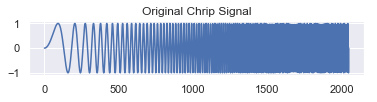

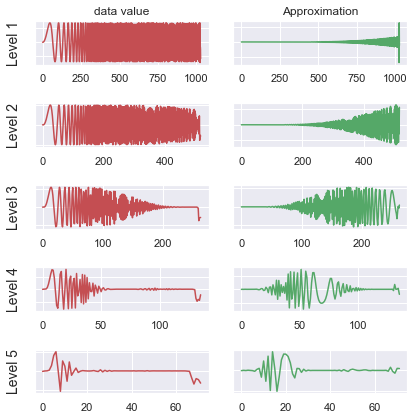

In [908]:

import pywt
x=np.linspace(0, 1, num=2048)
chrip_signal=np.sin(250*np.pi*x**2)

fig, ax=plt.subplots(figsize=(6,1))
ax.plot(chirp_signal)
ax.set_title('Original Chrip Signal')
plt.show()

data=chrip_signal
waveletname='sym5'
fig, axarr=plt.subplots(nrows=5, ncols=2, figsize=(6, 6))
for i in range(5):
    (data, coff)=pywt.dwt(data, waveletname)
    axarr[i, 0].plot(data, 'r')
    axarr[i, 1].plot(coff, 'g')
    axarr[i, 0].set_ylabel("Level {}".format(i+1), fontsize=14, rotation=90)
    axarr[i, 0].set_yticklabels([])
    if i==0:
        axarr[i, 0].set_title('data value')
        axarr[i, 1].set_title('Approximation')
    axarr[i, 1].set_yticklabels([])
    
plt.tight_layout()
plt.show()
    




In [867]:
from scipy.linalg import svd
A=np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
print(A)
U, sigma, VT=svd(A)
Sigma=np.diag(sigma)
print(sigma)
B=U.dot(Sigma.dot(VT))
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1.68481034e+01 1.06836951e+00 3.33475287e-16]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [874]:
def convertseriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(len(vectorSeries)-sequence_length+1):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix

In [880]:
net_data1=Net_series[:47].values
net_data2=convertseriesToMatrix(net_data1, 24)
print(len(net_data2), len(net_data2[1]))

24 24


In [885]:
P_data1=Solar_capacity[:47]
p_data2=convertseriesToMatrix(P_data1, 24)
print(len(p_data2), len(p_data2[1]))

24 24


In [892]:

U_N, sigma_N, V_N=svd(net_data2)
U_P, sigma_P, V_P=svd(p_data2)
sigma_B1=sigma_N+sigma_P
Sigma_B1=np.diag(sigma_B1)
Baseline1=U_N.dot(Sigma_B1.dot(V_N))

In [894]:
sigma_B2=sigma_N-sigma_P
Sigma_B2=np.diag(sigma_B2)
Baseline2=U_N.dot(Sigma_B2.dot(V_N))

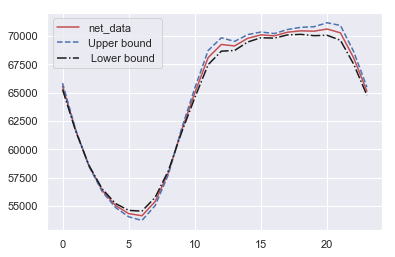

In [896]:
Net_data3=np.array(net_data2)
plt.plot(Net_data3[23,:], 'r-', label='net_data')
plt.plot(Baseline1[23, :], 'b--', label='Upper bound' )
plt.plot(Baseline2[23, :], 'k-.', label=' Lower bound ' )
plt.legend(loc='upper left')
plt.show()

In [629]:
Input_series=est_PV.values

In [630]:
def convertseriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(len(vectorSeries)-sequence_length+1):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix

In [670]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Net_series1=Net_series.values
Net_series1=Net_series1.reshape(-1, 1)
Net_scaling=scaler.fit_transform(Net_series1)
Net_scaling=Net_scaling.flatten()

C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [671]:
sequence_length=24
matrix_load=convertseriesToMatrix(Net_scaling, sequence_length)
matrix_load=np.array(matrix_load)

In [672]:
# split dataset: 90% for training and 10% for testing.
train_row= int(round((1-sequence_length/len(matrix_load))*matrix_load.shape[0]))
train_set=matrix_load[:train_row, :]
np.random.shuffle(train_set)
X_train=train_set[:, :-1]
y_train=train_set[:, -1]
X_test=matrix_load[train_row:, :-1]
y_test=matrix_load[train_row:, -1]
#########################################################
X_train_3D=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_3D=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_actual=scaler.inverse_transform(y_test)
print(Y_actual)

[55887. 53759. 52670. 52002. 51836. 52496. 55062. 59066. 64962. 67389.
 68558. 69054. 66457. 69933. 70922. 70105. 70616. 69376. 67547. 66873.
 66026. 63479. 60564. 59305.]


In [673]:
import math
def nMape(actual, pred):
    if (not len(actual)== len(pred) or len(actual)==0):
        return -1.0
    total=0.0
    cons=np.mean(actual)
    print(len(actual))
    for x in range(len(actual)):
        total += abs((pred[x]-actual[x]))/cons
    return(100*total/len(actual))

def nRmse(actual, pred):
    if (not len(actual) == len(pred) or len(actual)==0):
        return -1.0
    sumSquares=0.0
    sumSquares1=0.0
    max_actual=np.max(actual)
    min_actual=np.min(actual)
    for x in range(len(actual)):
        sumSquares +=math.pow(pred[x]-actual[x], 2.0)
    return math.sqrt(sumSquares/len(actual)), (math.sqrt(sumSquares/len(actual)/(max_actual-min_actual)))

In [674]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.models import Sequential
def convolution_Prediction(X_train_3D, y_train, X_test_3D):
    model=Sequential()
    model.add(Conv1D(input_shape=(23, 1), nb_filter=24, kernel_size=3, padding='same', activation='relu', subsample_length=1))
    model.add(MaxPooling1D(pool_length=2))
    model.add(Conv1D( input_shape=(23, 1), nb_filter=24,  kernel_size=3, padding='same', activation='relu', subsample_length=1))
    model.add(MaxPooling1D(pool_length=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))
    model.summary()
    model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
    model.fit(X_train_3D, y_train, batch_size=32, epochs=150,  verbose=1)
    y_pred=model.predict(X_test_3D)
    return y_pred

C:\Users\Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(23, 1), kernel_size=3, padding="same", activation="relu", filters=24, strides=1)`
  import sys
C:\Users\Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  
C:\Users\Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(23, 1), kernel_size=3, padding="same", activation="relu", filters=24, strides=1)`
  if __name__ == '__main__':
C:\Users\Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 23, 24)            96        
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 11, 24)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 11, 24)            1752      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 5, 24)             0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                6050      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
__________

7993/7993 [==============================] - 1s 94us/step - loss: 0.0586 - acc: 0.0000e+00
Epoch 67/150
7993/7993 [==============================] - 1s 93us/step - loss: 0.0565 - acc: 0.0000e+00
Epoch 68/150
7993/7993 [==============================] - 1s 95us/step - loss: 0.0593 - acc: 0.0000e+00
Epoch 69/150
7993/7993 [==============================] - 1s 92us/step - loss: 0.0570 - acc: 0.0000e+00
Epoch 70/150
7993/7993 [==============================] - 1s 93us/step - loss: 0.0566 - acc: 0.0000e+00
Epoch 71/150
7993/7993 [==============================] - 1s 138us/step - loss: 0.0564 - acc: 0.0000e+00
Epoch 72/150
7993/7993 [==============================] - 1s 94us/step - loss: 0.0569 - acc: 0.0000e+00
Epoch 73/150
7993/7993 [==============================] - 1s 99us/step - loss: 0.0566 - acc: 0.0000e+00
Epoch 74/150
7993/7993 [==============================] - 1s 93us/step - loss: 0.0561 - acc: 0.0000e+00
Epoch 75/150
7993/7993 [==============================] - 1s 93us/step - los

7993/7993 [==============================] - 1s 117us/step - loss: 0.0546 - acc: 0.0000e+00
Epoch 145/150
7993/7993 [==============================] - 1s 95us/step - loss: 0.0559 - acc: 0.0000e+00
Epoch 146/150
7993/7993 [==============================] - 1s 93us/step - loss: 0.0539 - acc: 0.0000e+00
Epoch 147/150
7993/7993 [==============================] - 1s 93us/step - loss: 0.0562 - acc: 0.0000e+00
Epoch 148/150
7993/7993 [==============================] - 1s 95us/step - loss: 0.0553 - acc: 0.0000e+00
Epoch 149/150
7993/7993 [==============================] - 1s 93us/step - loss: 0.0522 - acc: 0.0000e+00
Epoch 150/150
7993/7993 [==============================] - 1s 93us/step - loss: 0.0554 - acc: 0.0000e+00


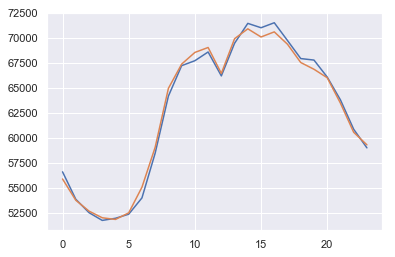

In [675]:
CNN_pred1=convolution_Prediction(X_train_3D, y_train, X_test_3D)
CNN_pred=scaler.inverse_transform(CNN_pred1)
plt.plot(CNN_pred)
plt.plot(Y_actual)
plt.show()

In [676]:
CNN_nMAPE=nMape(Y_actual, CNN_pred)
CNN_RMSE, CNN_nRMSE=nRmse(Y_actual, CNN_pred)
print(CNN_nMAPE, CNN_RMSE, CNN_nRMSE)

24
[0.74023885] 553.4579464783432 4.00614964321718


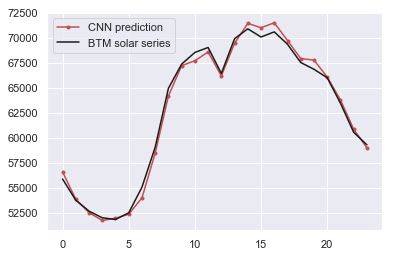

In [677]:
plt.plot(CNN_pred, '.r-', label='CNN prediction')
plt.plot(Y_actual, 'k-', label='BTM solar series')
plt.legend(loc='upper left')
plt.show()

In [928]:
from scipy.signal import argrelmax
x = np.array([1, 2, 5, 10, 2, 1, 3, 9])
argrelmax(x)

(array([3], dtype=int64),)

In [953]:
class Student:
    def __init__(self, name, age, grade):
        self.name=name
        self.age=age
        self.grade=grade
        
    def get_grade(self):
        return self.grade

class Course:
    def __init__(self, name, max_students):
        self.name=name
        self.max_students=max_students
        self.students=[]
    def add_student(self, student):
        if len(self.students) < self.max_students:
            self.students.append(student)
            return True
        return False
    def get_average_grade(self):
        value= 0
        for student in self.students:
            value +=student.get_grade()
        return value/len(self.students)
    
s1=Student("Tim", 19, 95)
s2=Student("Bill", 19, 75)
s3=Student("Jill", 19, 65)
    
course=Course("Science", 2)
course.add_student(s1)
course.add_student(s2)
print(course.students[1].name)

print(course.get_average_grade())

Bill
85.0
